In [1]:
!pip install graphviz==0.10
!apt-get install graphviz

'apt-get' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(treino_x, treino_y, teste_x,score_func=chi2, num_features='all'):
    print(num_features)
    fs = SelectKBest(score_func, k=num_features)
    fs.fit(treino_x, treino_y)
    X_train_fs = fs.transform(treino_x)
    X_test_fs = fs.transform(teste_x)
    return X_train_fs, X_test_fs, fs

def label_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_transformed = oe.transform(X)
    return X_transformed

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [3]:
uri = "dadosParaMineracaoRegrasAssociacao2019.csv"
dados = pd.read_csv(uri,sep=";",encoding='latin1')
dados

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,Q025,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA
0,F,Branco,15230023.0,Paragominas,PA,Particular,Urbano,574.2,538.7,582.6,...,Sim,1497,E,0,12,Branco,0.75,"(0, 1]",581.40,"(576.04, 713.43]"
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,Nao,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]"
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,Nao,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]"
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,Nao,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]"
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,Sim,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,31103527.0,João Monlevade,MG,Estadual,Urbano,533.3,485.8,530.2,...,Sim,998,E,9,12,Branco,2.50,"(2, 3]",536.96,"(438.65, 576.04]"
920584,F,Branco,31174688.0,Três Pontas,MG,Estadual,Urbano,486.2,543.4,560.3,...,Sim,7984,C,16,16,Branco,1.50,"(1, 2]",573.02,"(438.65, 576.04]"
920585,F,Preta,31253227.0,Ouro Preto,MG,Federal,Urbano,500.8,563.2,555.3,...,Sim,4990,C,16,18,NaoBranco,1.67,"(1, 2]",568.42,"(438.65, 576.04]"
920586,F,Parda,31009107.0,Uberlândia,MG,Federal,Urbano,491.6,549.3,586.8,...,Sim,7984,C,12,18,NaoBranco,1.33,"(1, 2]",580.24,"(576.04, 713.43]"


In [4]:
dados['TP_LINGUA'].replace(0, "Inglês", inplace=True)
dados['TP_LINGUA'].replace(1, "Espanhol", inplace=True)
dados.rename(columns={"Q024" : "Tem Computador"}, inplace=True)
dados.rename(columns={"Q022" : "Tem Celular"}, inplace=True)
dados.rename(columns={"Q025" : "Tem Internet"}, inplace=True)
dados.rename(columns={"Q001" : "Estudo Pai"}, inplace=True)
dados.rename(columns={"Q002" : "Estudo Mãe"}, inplace=True)
dados.rename(columns={"Q003" : "Trabalho Pai"}, inplace=True)
dados.rename(columns={"Q004" : "Trabalho Mãe"}, inplace=True)

In [5]:
dados.corr() 

,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,CO_UF_ESC,RendaMaxima,anosEstudoPai,anosEstudoMae,RazaoPessoasQuarto,NU_MEDIA
CO_ESCOLA,1.000000,0.142259,0.161311,0.184816,0.143689,0.054075,0.999832,0.191090,0.147437,0.135566,-0.217057,0.146180
NU_NOTA_CN,0.142259,1.000000,0.685881,0.656955,0.666904,0.555768,0.141072,0.418655,0.334228,0.328703,-0.205085,0.818776
NU_NOTA_CH,0.161311,0.685881,1.000000,0.754447,0.636118,0.593043,0.160145,0.393703,0.326592,0.323269,-0.200752,0.842673
NU_NOTA_LC,0.184816,0.656955,0.754447,1.000000,0.610408,0.589608,0.183608,0.376865,0.336342,0.339778,-0.206511,0.818940
NU_NOTA_MT,0.143689,0.666904,0.636118,0.610408,1.000000,0.550613,0.142574,0.452488,0.346289,0.340832,-0.209263,0.827570
NU_NOTA_REDACAO,0.054075,0.555768,0.593043,0.589608,0.550613,1.000000,0.053280,0.335351,0.286291,0.293318,-0.165982,0.851314
CO_UF_ESC,0.999832,0.141072,0.160145,0.183608,0.142574,0.053280,1.000000,0.190327,0.146734,0.134960,-0.216883,0.144934
RendaMaxima,0.191090,0.418655,0.393703,0.376865,0.452488,0.335351,0.190327,1.000000,0.457393,0.418330,-0.246876,0.466206
anosEstudoPai,0.147437,0.334228,0.326592,0.336342,0.346289,0.286291,0.146734,0.457393,1.000000,0.533907,-0.208691,0.383307
anosEstudoMae,0.135566,0.328703,0.323269,0.339778,0.340832,0.293318,0.134960,0.418330,0.533907,1.000000,-0.237118,0.383458


## Reunião TCC

#### Entrega Projeto de TCC dia 17/01
#### Trabalho tem que ser enviado para avaliação dia 1/03
#### 15/03 Defesa TCC
#### Submissão versão final - se aprovado

# O que Temos?

#### Texto 




# Classificação Binária


## Qual classificação vamos usar?

* Terceiro Quartil (Adeodato 2019) https://sci-hub.se/https://ieeexplore.ieee.org/abstract/document/8923965
* 600 (Franco 2020) https://sol.sbc.org.br/index.php/sbie/article/view/12867
<!-- * KMeans Clustering (Silva, 2020) https://sol.sbc.org.br/index.php/sbie/article/view/12763 -->

In [6]:
classificacao = dados.NU_MEDIA > dados.NU_MEDIA.quantile(0.75)
#classificacao = dados.NU_MEDIA > 600

dados['classificacao'] = classificacao

# dados['classificacao'].replace(False, "Baixo Desempenho", inplace=True)
# dados['classificacao'].replace(True, "Alto Desempenho", inplace=True)
dados['classificacao'].replace(False, 0, inplace=True)
dados['classificacao'].replace(True, 1, inplace=True)


In [7]:
dados.classificacao.value_counts()

0.0    690482
1.0    230106
Name: classificacao, dtype: int64

In [8]:
dados.columns.tolist()

['TP_SEXO',
 'TP_COR_RACA',
 'CO_ESCOLA',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'NU_NOTA_REDACAO',
 'CO_UF_ESC',
 'Estudo Pai',
 'Estudo Mãe',
 'Trabalho Pai',
 'Trabalho Mãe',
 'Tem Celular',
 'Tem Computador',
 'Tem Internet',
 'RendaMaxima',
 'ClasseSocial',
 'anosEstudoPai',
 'anosEstudoMae',
 'COR_RACA',
 'RazaoPessoasQuarto',
 'PessoasPorQuarto',
 'NU_MEDIA',
 'MEDIA_FAIXA',
 'classificacao']

Treinaremos com 690441 elementos e testaremos com 230147 elementos
5
Feature 0: 0.020321
Feature 1: 0.064688
Feature 2: 0.018898
Feature 3: 0.112223
Feature 4: 0.099747
Feature 5: 0.056288
Feature 6: 0.080509
Feature 7: 0.081091
Feature 8: 0.061867
Feature 9: 0.054017
Feature 10: 0.103891
Feature 11: 0.074223
Feature 12: 0.087044
Feature 13: 0.146492
A acurácia foi 81.93%
0.8039624645723827


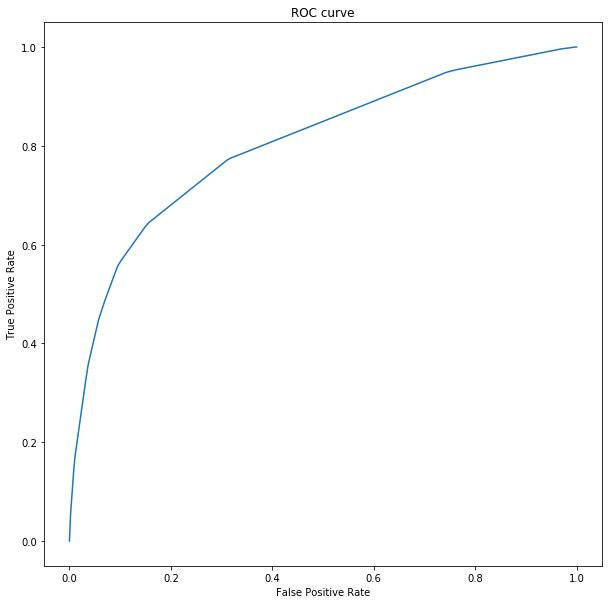

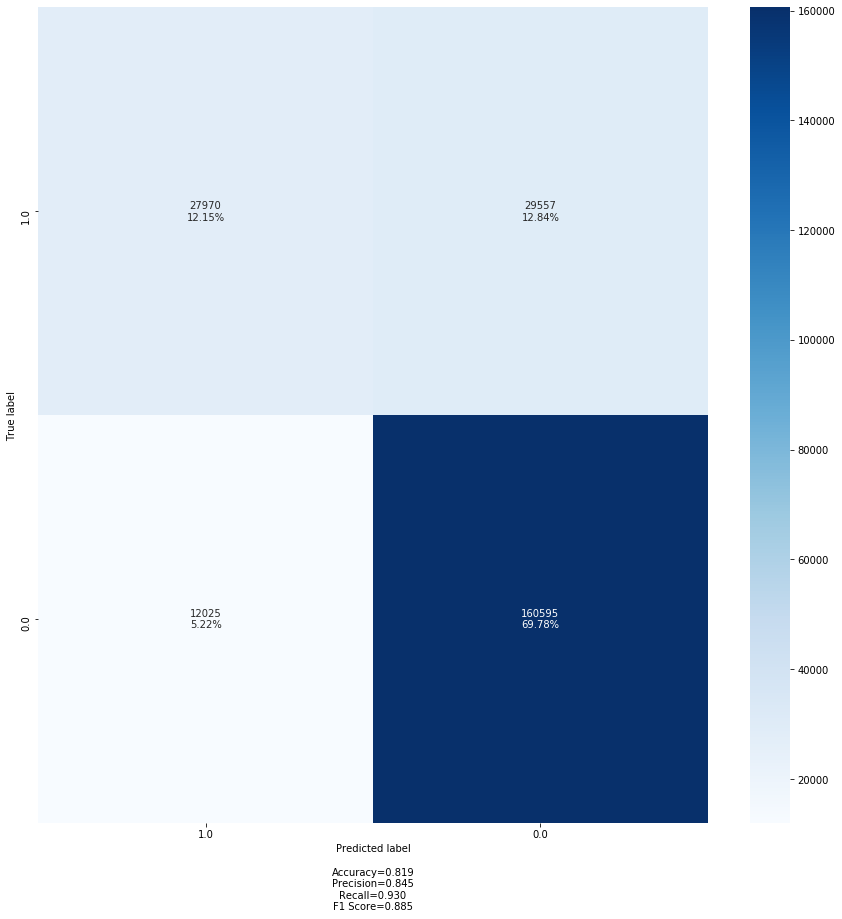

In [27]:
x = dados[['TP_SEXO',
 'TP_COR_RACA',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_LINGUA',
 'Estudo Pai',
 'Estudo Mãe',
 'Trabalho Pai',
 'Trabalho Mãe',
 'Tem Celular',
 'Tem Computador',
 'Tem Internet',
 'ClasseSocial']]
x = x.astype(str)
y = dados["classificacao"]
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
X_train_fs, X_test_fs, fs = select_features(treino_x_enc, treino_y_enc, teste_x_enc,mutual_info_classif, 5)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
result_selection = pd.DataFrame(fs.scores_,[i for i in range(len(fs.scores_))])
dict_qtd = {0:"Features"}
result_selection.rename(columns = dict_qtd , inplace = True)
x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()



A acurácia foi 81.93%
0.8039602272305126


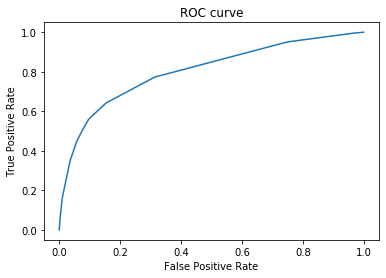

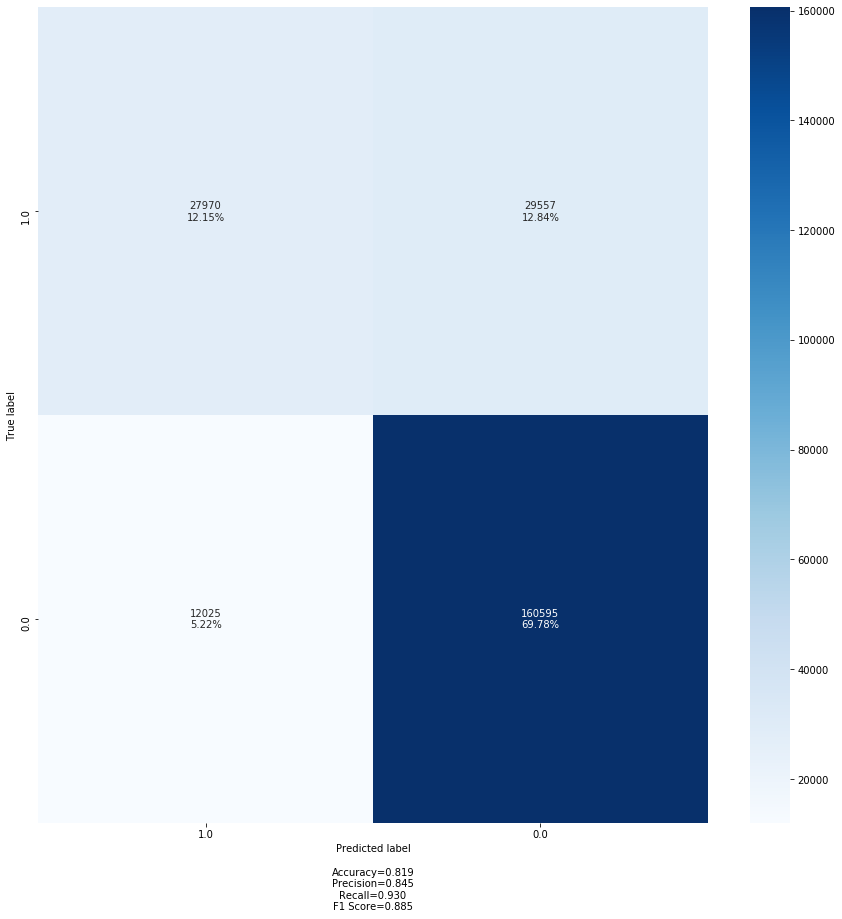

In [29]:
# grafico.axes.set_ylim(0,100000)
modelo = DecisionTreeClassifier()
modelo = modelo.fit(X_train_fs, treino_y_enc)
previsoes = modelo.predict(X_test_fs)
 
acuracia = accuracy_score(teste_y_enc, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y_enc,X_test_fs,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

In [30]:
# features = x.columns.tolist()
r = export_text(modelo)
print(r)

|--- feature_0 <= 0.50
|   |--- feature_4 <= 3.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |

In [39]:
 x.iloc[:,[0]].columns.tolist()[0]

'TP_SEXO'

In [58]:
result_selection.iloc[0].values[0]

0.02032054983433751

In [64]:
scores = {}
for i in range(len(result_selection)):
#     print(x.iloc[:,[i]].columns.tolist()[0])
    scores[x.iloc[:,[i]].columns.tolist()[0]] = result_selection.iloc[i].values[0]
print(scores)

{'TP_SEXO': 0.02032054983433751, 'TP_COR_RACA': 0.06468810742362097, 'SG_UF_ESC': 0.018897534657676518, 'TP_DEPENDENCIA_ADM_ESC': 0.11222317944964821, 'TP_LOCALIZACAO_ESC': 0.0997465952018528, 'TP_LINGUA': 0.056287679972094606, 'Estudo Pai': 0.08050904806379955, 'Estudo Mãe': 0.0810908372403718, 'Trabalho Pai': 0.06186681811919348, 'Trabalho Mãe': 0.0540170657673984, 'Tem Celular': 0.10389127859109393, 'Tem Computador': 0.07422299016602607, 'Tem Internet': 0.08704419860555457, 'ClasseSocial': 0.1464917226879865}


In [67]:
sorted(scores.items(), key=lambda item: item[1])

[('SG_UF_ESC', 0.018897534657676518),
 ('TP_SEXO', 0.02032054983433751),
 ('Trabalho Mãe', 0.0540170657673984),
 ('TP_LINGUA', 0.056287679972094606),
 ('Trabalho Pai', 0.06186681811919348),
 ('TP_COR_RACA', 0.06468810742362097),
 ('Tem Computador', 0.07422299016602607),
 ('Estudo Pai', 0.08050904806379955),
 ('Estudo Mãe', 0.0810908372403718),
 ('Tem Internet', 0.08704419860555457),
 ('TP_LOCALIZACAO_ESC', 0.0997465952018528),
 ('Tem Celular', 0.10389127859109393),
 ('TP_DEPENDENCIA_ADM_ESC', 0.11222317944964821),
 ('ClasseSocial', 0.1464917226879865)]

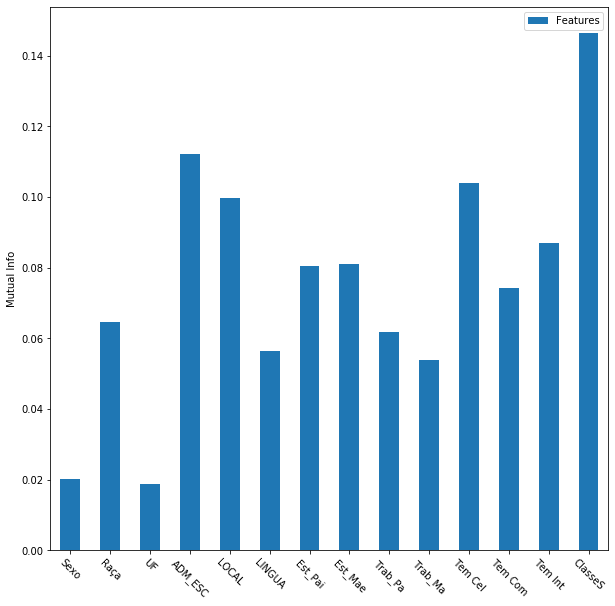

In [28]:
grafico = result_selection.plot.bar()
grafico.figure.set_figwidth(10)
grafico.figure.set_figheight(10)

# features_selecionadas_plotagem = x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()
features_selecionadas_plotagem = ['Sexo','Raça','UF','ADM_ESC','LOCAL','LINGUA','Est_Pai',
                                   'Est_Mae','Trab_Pai','Trab_Mae','Tem Celular','Tem Computador','Tem Internet','ClasseSocial']
xticklabels = grafico.axes.set_xticklabels(features_selecionadas_plotagem,rotation=-45)

# grafico.axes.set_xticklabels([str(tick)[:45] for tick in grafico.axes.get_xticklabels()])
grafico.axes.set_xticklabels(item.get_text()[:7] for item in grafico.axes.get_xticklabels())
ylabel = grafico.set_ylabel("Mutual Info")

In [7]:
# x = dados[["Q002", "RendaMaxima","TP_DEPENDENCIA_ADM_ESC","Q024","TP_COR_RACA", "TP_SEXO"]]
x = dados[['TP_SEXO',
 'TP_COR_RACA',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_LINGUA',
 'Estudo Pai',
 'Estudo Mãe',
 'Trabalho Pai',
 'Trabalho Mãe',
 'Tem Celular',
 'Tem Computador',
 'Tem Internet',
 'ClasseSocial']]

y = dados["classificacao"]

In [8]:
x = x.astype(str)

In [9]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 690441 elementos e testaremos com 230147 elementos


In [10]:
# # prepare input data
treino_x_enc, teste_x_enc = prepare_inputs(treino_x, teste_x)
# prepare output data
treino_y_enc, teste_y_enc = prepare_targets(treino_y, teste_y)

In [12]:
X_train_fs, X_test_fs, fs = select_features(treino_x_enc, treino_y_enc, teste_x_enc,chi2, 5)


5


In [13]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
result_selection = pd.DataFrame(fs.scores_,[i for i in range(len(fs.scores_))])
dict_qtd = {0:"Features"}
result_selection.rename(columns = dict_qtd , inplace = True)
x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()

Feature 0: 2379.446625
Feature 1: 24540.577908
Feature 2: 17390.909874
Feature 3: 326332.672421
Feature 4: 37.527613
Feature 5: 17872.775851
Feature 6: 39578.771346
Feature 7: 53228.402659
Feature 8: 15367.372279
Feature 9: 22708.941672
Feature 10: 37.968189
Feature 11: 29468.097290
Feature 12: 6005.566415
Feature 13: 30622.491036


['TP_SEXO',
 'TP_COR_RACA',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_LINGUA',
 'Estudo Pai',
 'Estudo Mãe',
 'Trabalho Pai',
 'Trabalho Mãe',
 'Tem Celular',
 'Tem Computador',
 'Tem Internet',
 'ClasseSocial']

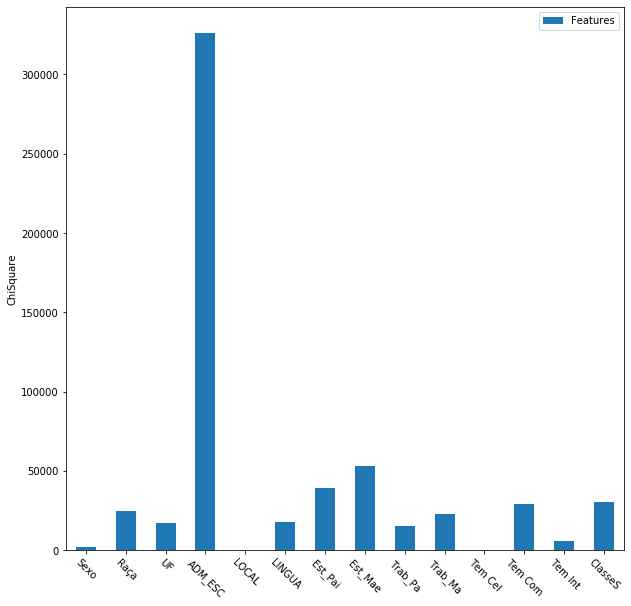

In [14]:
grafico = result_selection.plot.bar()
grafico.figure.set_figwidth(10)
grafico.figure.set_figheight(10)

# features_selecionadas_plotagem = x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()
features_selecionadas_plotagem = ['Sexo','Raça','UF','ADM_ESC','LOCAL','LINGUA','Est_Pai',
                                   'Est_Mae','Trab_Pai','Trab_Mae','Tem Celular','Tem Computador','Tem Internet','ClasseSocial']
xticklabels = grafico.axes.set_xticklabels(features_selecionadas_plotagem,rotation=-45)

# grafico.axes.set_xticklabels([str(tick)[:45] for tick in grafico.axes.get_xticklabels()])
grafico.axes.set_xticklabels(item.get_text()[:7] for item in grafico.axes.get_xticklabels())
ylabel = grafico.set_ylabel("ChiSquare")
# grafico.axes.set_ylim(0,100000)

In [15]:
len(X_train_fs[0])

5

A acurácia foi 82.16%
0.8192789895011885


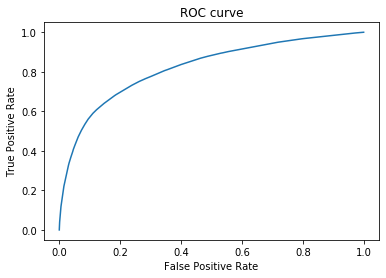

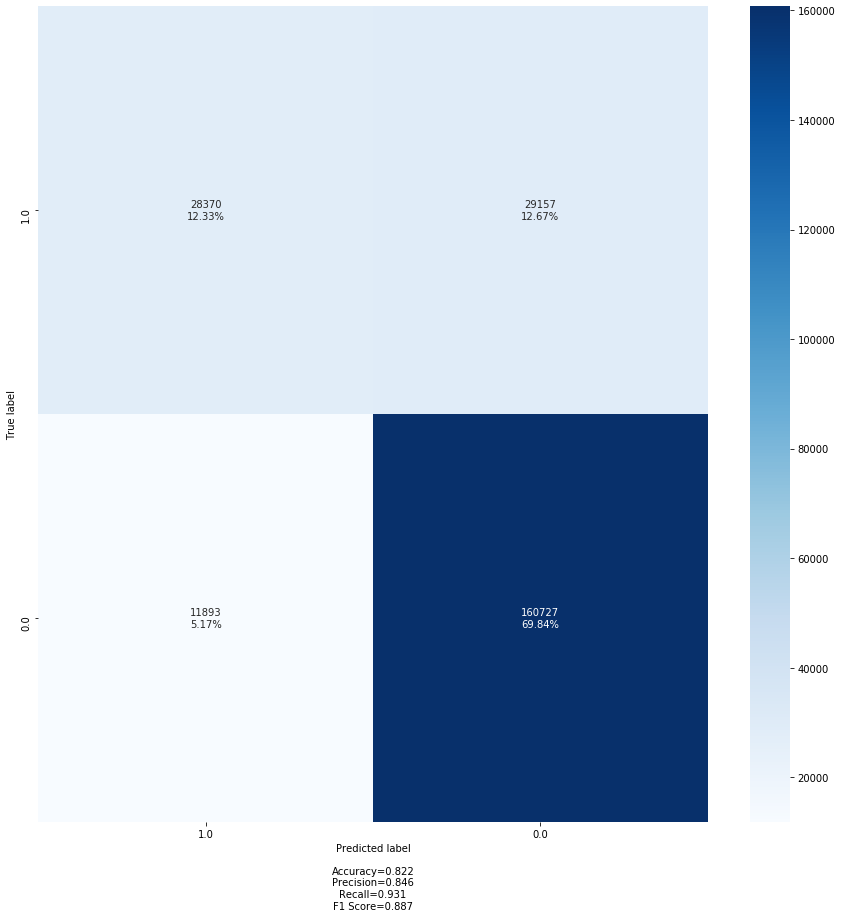

In [19]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo = modelo.fit(X_train_fs, treino_y_enc)
previsoes = modelo.predict(X_test_fs)
 
acuracia = accuracy_score(teste_y_enc, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y_enc,X_test_fs,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

In [20]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(teste_y_enc, previsoes)

0.4835251348365753

In [23]:
# features = x.columns.tolist()
r = export_text(modelo)
print(r)


|--- feature_0 <= 0.50
|   |--- feature_4 <= 3.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  3.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature

In [26]:
# one_hot_data = pd.get_dummies(x)
# x = one_hot_data

# y=y.astype('string')

In [44]:
# x.drop("classificacao",inplace=True,axis=1)
x

,TP_SEXO,TP_COR_RACA,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_LINGUA,Estudo Pai,Estudo Mãe,Trabalho Pai,Trabalho Mãe,Tem Celular,Tem Computador,Tem Internet,ClasseSocial
0,F,Branco,PA,Particular,Urbano,Inglês,NaoSabe,Medio,"Grupo(A,B,C)","Grupo(D,E)",Sim,Sim,Sim,E
1,F,Parda,PA,Estadual,Urbano,Inglês,FundamentalIncompleto,FundamentalIncompleto,"Grupo(A,B,C)","Grupo(A,B,C)",Sim,Não,Nao,E
2,F,Parda,PA,Estadual,Urbano,Espanhol,FundamentalIncompleto,FundamentalCompleto,"Grupo(A,B,C)","Grupo(A,B,C)",Sim,Não,Nao,E
3,F,Parda,PA,Estadual,Urbano,Inglês,Medio,Medio,"Grupo(A,B,C)","Grupo(A,B,C)",Sim,Não,Nao,E
4,F,Parda,PA,Estadual,Urbano,Espanhol,Medio,Medio,"Grupo(A,B,C)","Grupo(A,B,C)",Sim,Não,Sim,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,MG,Estadual,Urbano,Inglês,FundamentalCompleto,Medio,"Grupo(D,E)","Grupo(D,E)",Sim,Sim,Sim,E
920584,F,Branco,MG,Estadual,Urbano,Inglês,Superior,Superior,"Grupo(D,E)","Grupo(D,E)",Sim,Sim,Sim,C
920585,F,Preta,MG,Federal,Urbano,Inglês,Superior,Superior,"Grupo(D,E)","Grupo(D,E)",Sim,Sim,Sim,C
920586,F,Parda,MG,Federal,Urbano,Espanhol,Medio,Superior,"Grupo(A,B,C)","Grupo(D,E)",Sim,Sim,Sim,C


In [45]:
y.value_counts(normalize=True)

0.0    0.750045
1.0    0.249955
Name: classificacao, dtype: float64

## Treino e Teste

In [29]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.75,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 230147 elementos e testaremos com 690441 elementos


## Baseline

A acurácia foi 49.96%
0.5


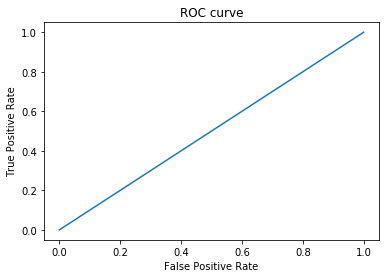

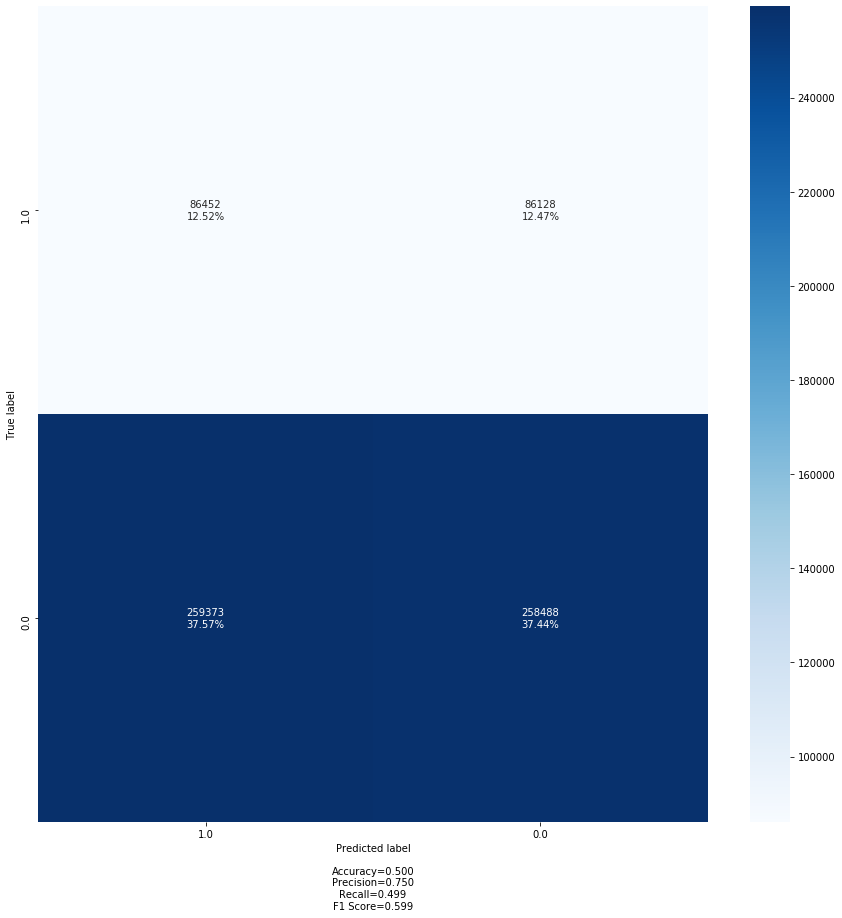

In [33]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform") #uniform
dummy_clf.fit(treino_x, treino_y)
 
previsoes_burras = dummy_clf.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes_burras) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,dummy_clf)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes_burras,labels), figsize=(15,15), categories=labels)

A acurácia foi 75.00%
0.5


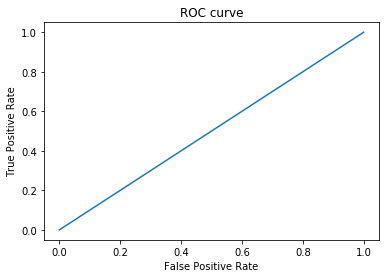

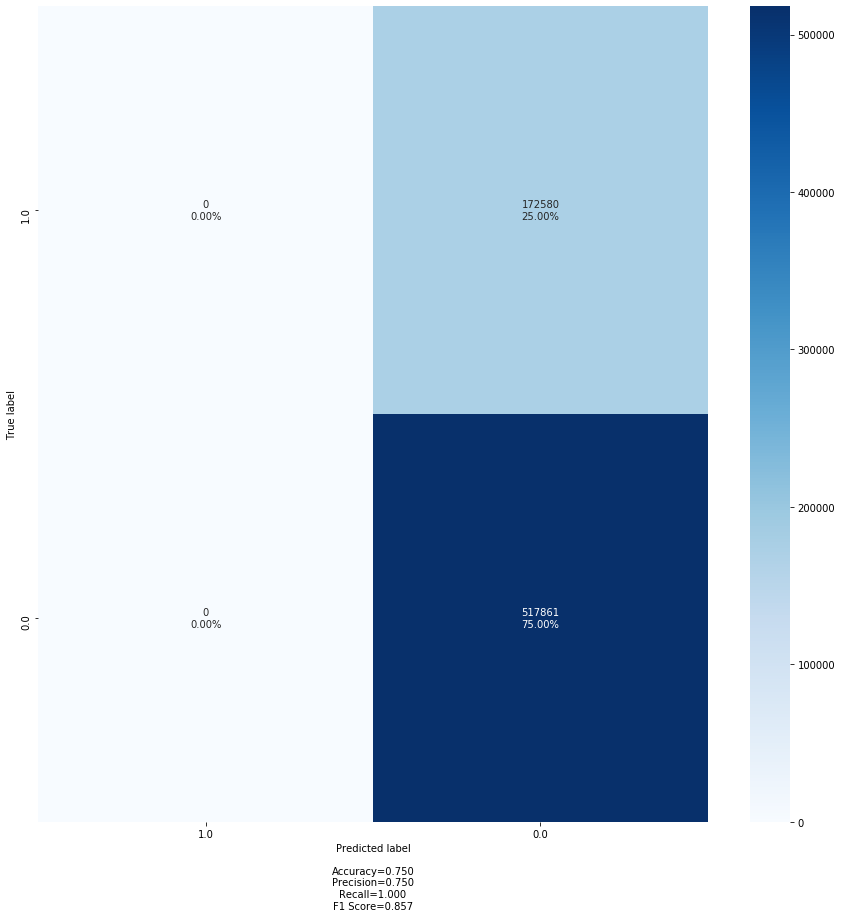

In [34]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(treino_x, treino_y)
 
previsoes_burras = dummy_clf.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes_burras) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,dummy_clf)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes_burras,labels), figsize=(15,15), categories=labels)

## Decision Tree Classifier

A acurácia foi 79.62%
0.721950829575645


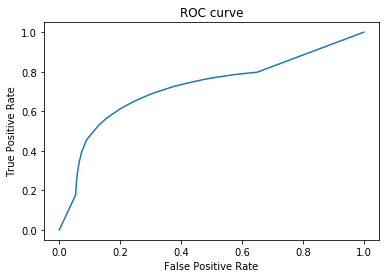

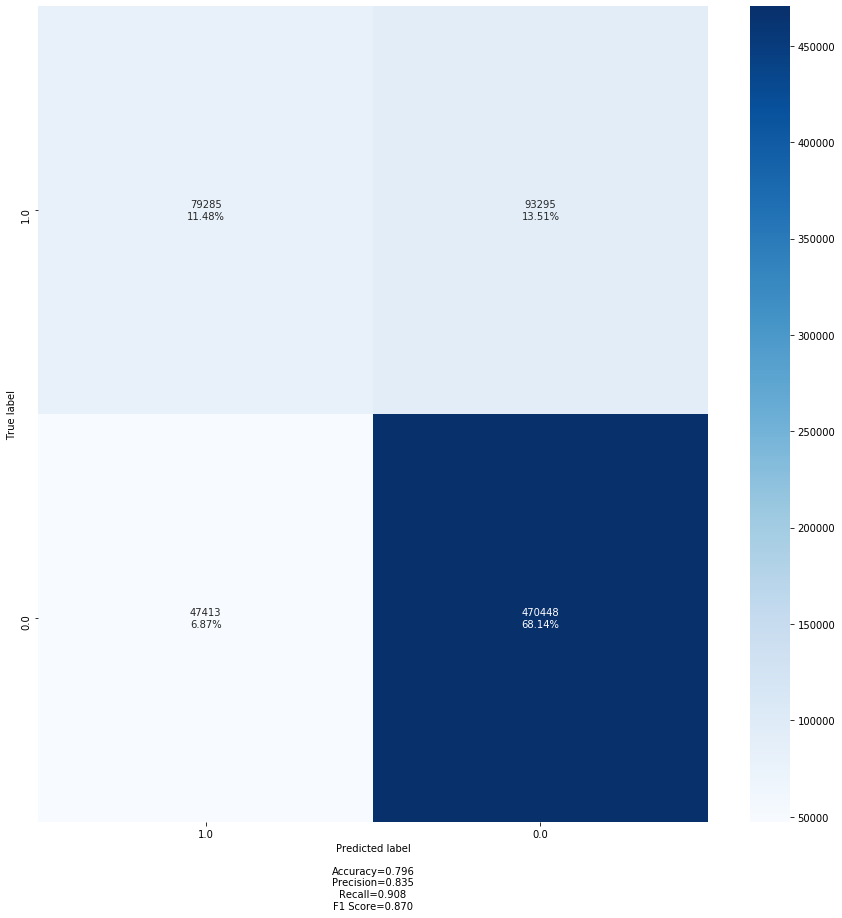

In [110]:
modelo = DecisionTreeClassifier()
modelo = modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)





A acurácia foi 82.53%
0.8288984863973192


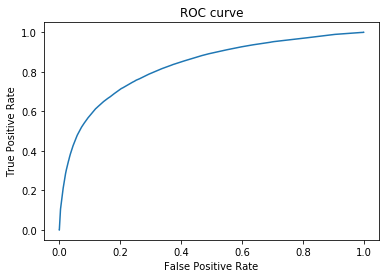

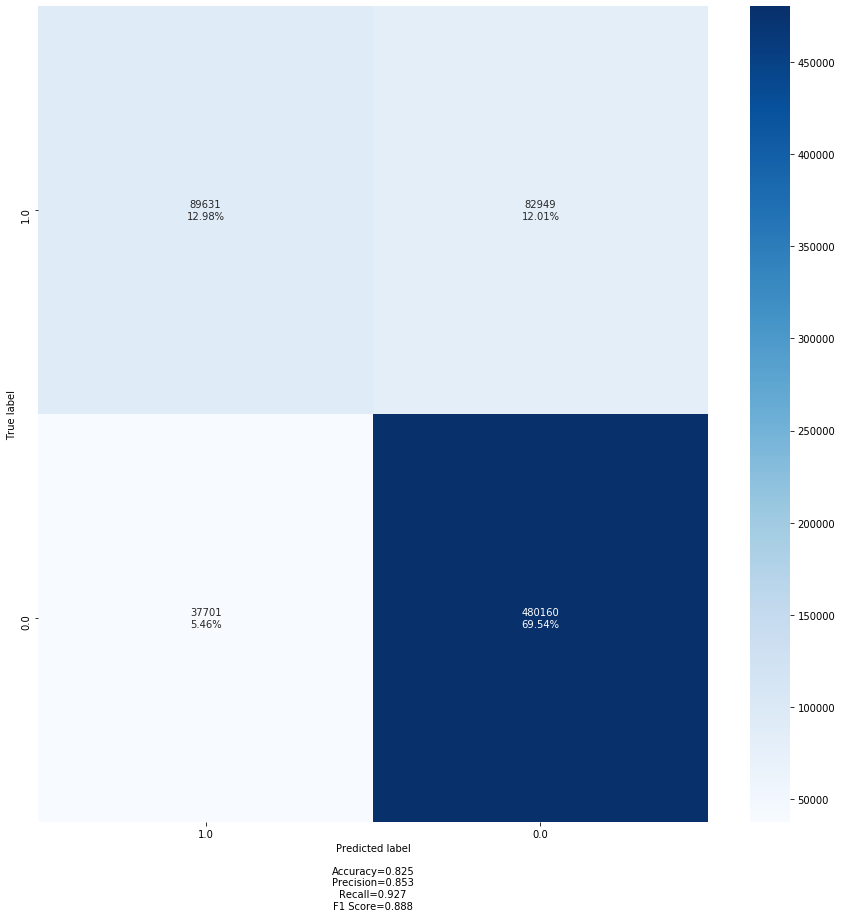

In [35]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo = modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

In [21]:
features = x.columns.tolist()
r = export_text(modelo, feature_names=features)
print(r)



|--- TP_DEPENDENCIA_ADM_ESC_Estadual <= 0.50
|   |--- RendaMaxima <= 3493.00
|   |   |--- TP_LINGUA_Inglês <= 0.50
|   |   |   |--- Tem Computador_Sim <= 0.50
|   |   |   |   |--- TP_DEPENDENCIA_ADM_ESC_Municipal <= 0.50
|   |   |   |   |   |--- RendaMaxima <= 1247.50
|   |   |   |   |   |   |--- TP_LOCALIZACAO_ESC_Urbano <= 0.50
|   |   |   |   |   |   |   |--- COR_RACA_NaoBranco <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- COR_RACA_NaoBranco >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- TP_LOCALIZACAO_ESC_Urbano >  0.50
|   |   |   |   |   |   |   |--- COR_RACA_NaoBranco <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- COR_RACA_NaoBranco >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- RendaMaxima >  1247.50
|   |   |   |   |   |   |--- RendaMaxima <= 2744.50
|   |   |   |   |   |   |   |--- Estudo Mãe_FundamentalIncompleto <= 0.50

In [54]:
print(confusion_matrix(teste_y, previsoes))
print(classification_report(teste_y, previsoes))

[[160233  12387]
 [ 28889  28638]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89    172620
         1.0       0.70      0.50      0.58     57527

    accuracy                           0.82    230147
   macro avg       0.77      0.71      0.73    230147
weighted avg       0.81      0.82      0.81    230147



In [24]:
# dot_data = export_graphviz(modelo, out_file=None, 
#                                 feature_names=x.columns.tolist(),  
#                    class_names=["0","1"],
#                    filled=True)
 
# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

# Naive Bayes

In [38]:
from sklearn.naive_bayes import CategoricalNB


from sklearn.model_selection import cross_validate
modelo = CategoricalNB()
cross_validate(modelo, x, y, return_train_score=False,
               scoring=['accuracy',
                        'average_precision',
                        'f1',
                        'precision',
                        'recall',
                        'roc_auc'])


{'fit_time': array([1.17984295, 1.18080831, 1.2306726 , 1.27159762, 1.18582797]),
 'score_time': array([0.73506379, 0.76497698, 0.78490067, 0.77894473, 0.74403787]),
 'test_accuracy': array([0.79033011, 0.79116653, 0.80004128, 0.76959216, 0.75584004]),
 'test_average_precision': array([0.62578336, 0.65506073, 0.66894933, 0.67511949, 0.65908057]),
 'test_f1': array([0.56557359, 0.60460285, 0.6154746 , 0.62424489, 0.61711297]),
 'test_precision': array([0.58657796, 0.57390235, 0.5925628 , 0.52690761, 0.50747335]),
 'test_recall': array([0.54602147, 0.6387736 , 0.64022946, 0.76569392, 0.78718411]),
 'test_roc_auc': array([0.78957844, 0.81974904, 0.82244709, 0.84486462, 0.8430793 ])}

# KNN


In [39]:
from sklearn.neighbors import KNeighborsClassifier
k = 8 
modelo = KNeighborsClassifier(n_neighbors = k)
cross_validate(modelo, x, y, return_train_score=False,
               scoring=['accuracy',
                        'average_precision',
                        'f1',
                        'precision',
                        'recall',
                        'roc_auc'])


#10 min execução

{'fit_time': array([447.78657389, 467.38541532, 558.35791659, 558.18993187,
        455.14826608]),
 'score_time': array([723.87583828, 730.3173945 , 763.76054001, 739.18397045,
        626.61121774]),
 'test_accuracy': array([0.80511411, 0.810301  , 0.81577575, 0.81721405, 0.81265717]),
 'test_average_precision': array([0.54958479, 0.56766711, 0.58544537, 0.59910108, 0.58697802]),
 'test_f1': array([0.46420785, 0.49969203, 0.53316267, 0.59422701, 0.59474828]),
 'test_precision': array([0.74202788, 0.7331652 , 0.72717375, 0.66749736, 0.6474395 ]),
 'test_recall': array([0.33775151, 0.37900089, 0.42087308, 0.53545121, 0.54998805]),
 'test_roc_auc': array([0.75056666, 0.7701142 , 0.78225007, 0.81204902, 0.81143888])}

In [26]:
predicoes = neigh.predict(teste_x)
#10 min execução

In [27]:
print("Accuracy of model at K=4 is",accuracy_score(teste_y, predicoes))

Accuracy of model at K=4 is 0.8012922175826754


In [23]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k,n_jobs=3).fit(treino_x,treino_y)
# 25 segundos execução

In [24]:
predicoes = neigh.predict(teste_x)
#4 min e 17s execução com n jobs =3

0.7684392024058186


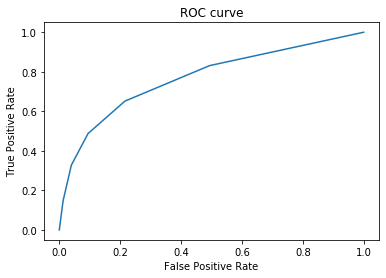

In [25]:
calcRoc(teste_y,teste_x,neigh)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 7 
neigh = KNeighborsClassifier(n_neighbors = k,n_jobs=3).fit(treino_x,treino_y)

In [29]:
predicoes = neigh.predict(teste_x)

0.780881301255407


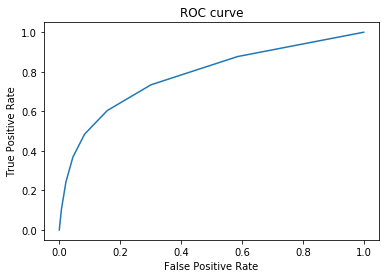

In [30]:
calcRoc(teste_y,teste_x,neigh)


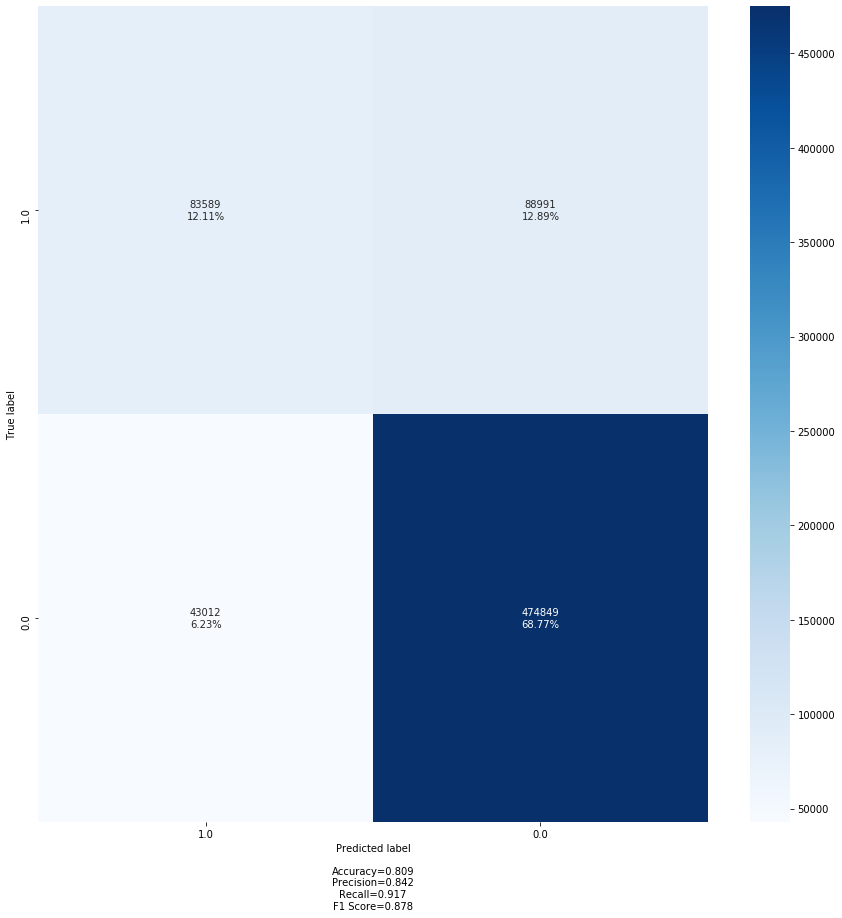

In [31]:
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, predicoes,labels), figsize=(15,15), categories=labels)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
k = 8 
neigh = KNeighborsClassifier(n_neighbors = k,n_jobs=3).fit(treino_x,treino_y)

In [33]:
predicoes = neigh.predict(teste_x)

0.7857992114862812


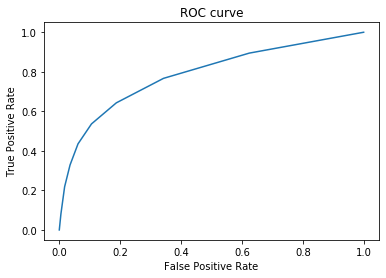

In [34]:
calcRoc(teste_y,teste_x,neigh)


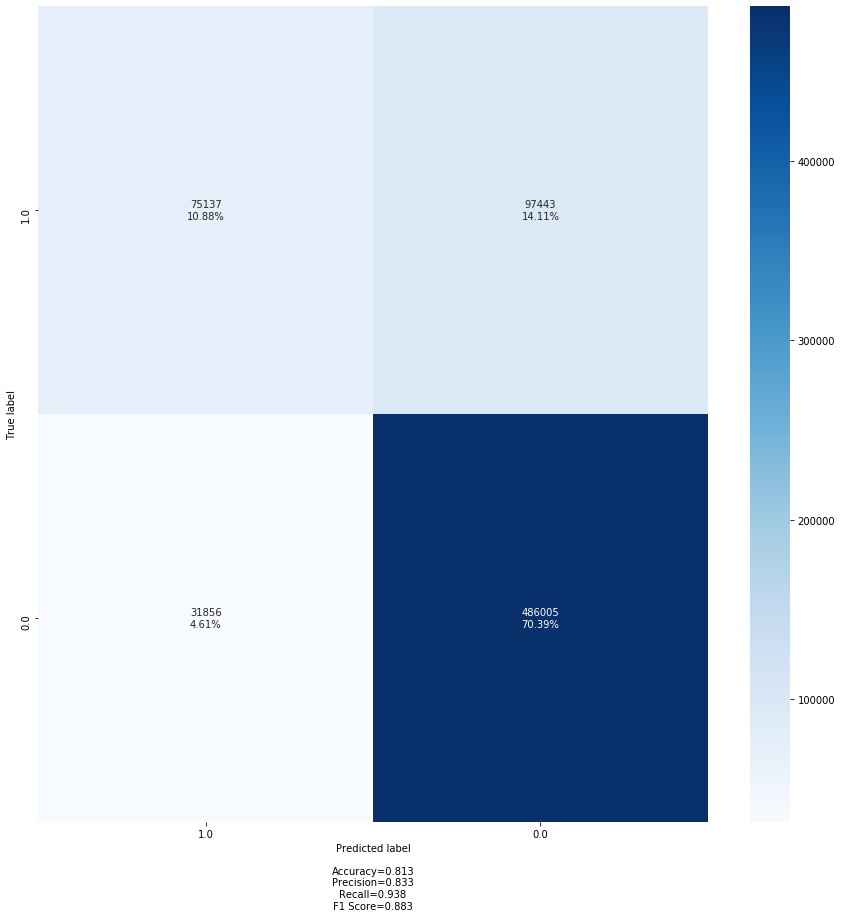

In [35]:
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, predicoes,labels), figsize=(15,15), categories=labels)

In [41]:
dados.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual' & classificacao == 1 ")

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA,classificacao
6,F,Parda,15127311.0,Marabá,PA,Estadual,Urbano,509.8,494.9,540.5,...,2495,D,5,9,NaoBranco,2.00,"(1, 2]",609.90,"(576.04, 713.43]",1.0
12,M,Parda,15038378.0,Belém,PA,Estadual,Urbano,624.0,560.3,565.9,...,1497,E,9,16,NaoBranco,1.00,"(0, 1]",634.98,"(576.04, 713.43]",1.0
18,F,Parda,15167453.0,Parauapebas,PA,Estadual,Urbano,465.0,570.9,574.2,...,1497,E,4,12,NaoBranco,3.50,"(3, 4]",588.82,"(576.04, 713.43]",1.0
29,F,Parda,15141128.0,Xinguara,PA,Estadual,Urbano,586.3,561.2,587.2,...,1497,E,4,18,NaoBranco,2.00,"(1, 2]",627.60,"(576.04, 713.43]",1.0
32,F,Branco,15040364.0,Belém,PA,Estadual,Urbano,496.1,619.6,563.5,...,998,E,12,12,Branco,5.00,"(4, 20]",627.96,"(576.04, 713.43]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920508,F,Parda,22027343.0,Teresina,PI,Estadual,Urbano,551.3,508.0,565.4,...,2495,D,0,9,NaoBranco,2.00,"(1, 2]",617.44,"(576.04, 713.43]",1.0
920531,F,Parda,25097725.0,João Pessoa,PB,Estadual,Urbano,573.8,546.7,565.3,...,1996,E,12,12,NaoBranco,4.00,"(3, 4]",629.34,"(576.04, 713.43]",1.0
920568,M,Preta,29403230.0,Irecê,BA,Estadual,Urbano,621.0,611.5,597.4,...,4990,C,12,18,NaoBranco,1.33,"(1, 2]",653.24,"(576.04, 713.43]",1.0
920576,F,Branco,31167339.0,Uberlândia,MG,Estadual,Urbano,556.8,599.2,556.6,...,19960,B,12,12,Branco,2.00,"(1, 2]",602.04,"(576.04, 713.43]",1.0


In [44]:
dados.NU_MEDIA.quantile(0.75)

580.64

Minimum error:- 0.1872701650104788 at K = 2


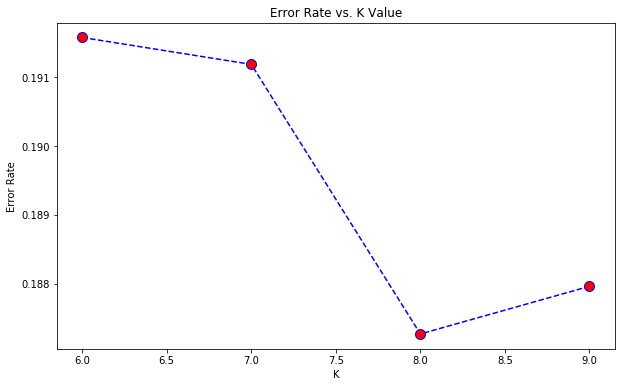

In [27]:

error_rate = []
for i in range(6,10):
 knn = KNeighborsClassifier(n_neighbors=i, n_jobs=3)
 knn.fit(treino_x,treino_y)
 pred_i = knn.predict(teste_x)
 error_rate.append(np.mean(pred_i != teste_y))

plt.figure(figsize=(10,6))
plt.plot(range(6,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
error_rate = []
for i in range(6,10):
 knn = KNeighborsClassifier(n_neighbors=i, n_jobs=3)
 knn.fit(treino_x,treino_y)
 pred_i = knn.predict(teste_x)
 error_rate.append(np.mean(pred_i != teste_y))

plt.figure(figsize=(10,6))
plt.plot(range(11,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(treino_x, treino_y)
treino_x_fs = fs.transform(treino_x)
teste_x_fs = fs.transform(teste_x)

In [61]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 172549476.474190
Feature 1: 4120.974543
Feature 2: 583.411591
Feature 3: 809.941052
Feature 4: 11819.981815
Feature 5: 6993.212875
Feature 6: 4.317113
Feature 7: 35600.452892
Feature 8: 378.233260
Feature 9: 12.981742
Feature 10: 6943.535087
Feature 11: 5996.952638
Feature 12: 435.853661
Feature 13: 5902.026168
Feature 14: 628.159764
Feature 15: 1544.555696
Feature 16: 19733.436882
Feature 17: 1542.335281
Feature 18: 6248.321276
Feature 19: 8.346274
Feature 20: 963.123699
Feature 21: 17742.589496
Feature 22: 466.248733
Feature 23: 11.853517
Feature 24: 10974.304741
Feature 25: 9714.953874
Feature 26: 7109.052618
Feature 27: 1941.023897
Feature 28: 5853.760278
Feature 29: 3774.421059
Feature 30: 14.586234


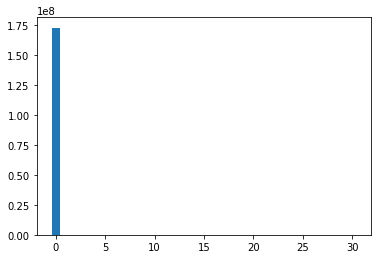

In [65]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [66]:
[i for i in range(len(fs.scores_))]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [50]:
final_comp = 3
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(x)
cluster_df=Final_PCA.transform(x)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 3 components, we can explain 0.9999997546908175% of the variability in the original data.


# Substituindo Municipal por Estadual e Federal por Particular


In [ ]:
x = dados[['TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_LINGUA',
       'Estudo Pai', 'Estudo Mãe',
       'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima',
       'COR_RACA', 'RazaoPessoasQuarto' 
    ]]

y = dados["classificacao"]

# y=y.astype('string')

In [ ]:
x.TP_DEPENDENCIA_ADM_ESC.replace(to_replace='Municipal',value="Estadual",inplace=True)
x.TP_DEPENDENCIA_ADM_ESC.replace(to_replace='Federal',value="Particular",inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
one_hot_data = pd.get_dummies(x)
x = one_hot_data


In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.75,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


Treinaremos com 230147 elementos e testaremos com 690441 elementos


A acurácia foi 82.41%
0.8262710021516252


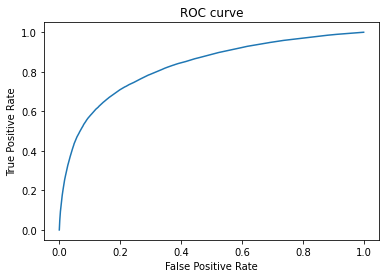

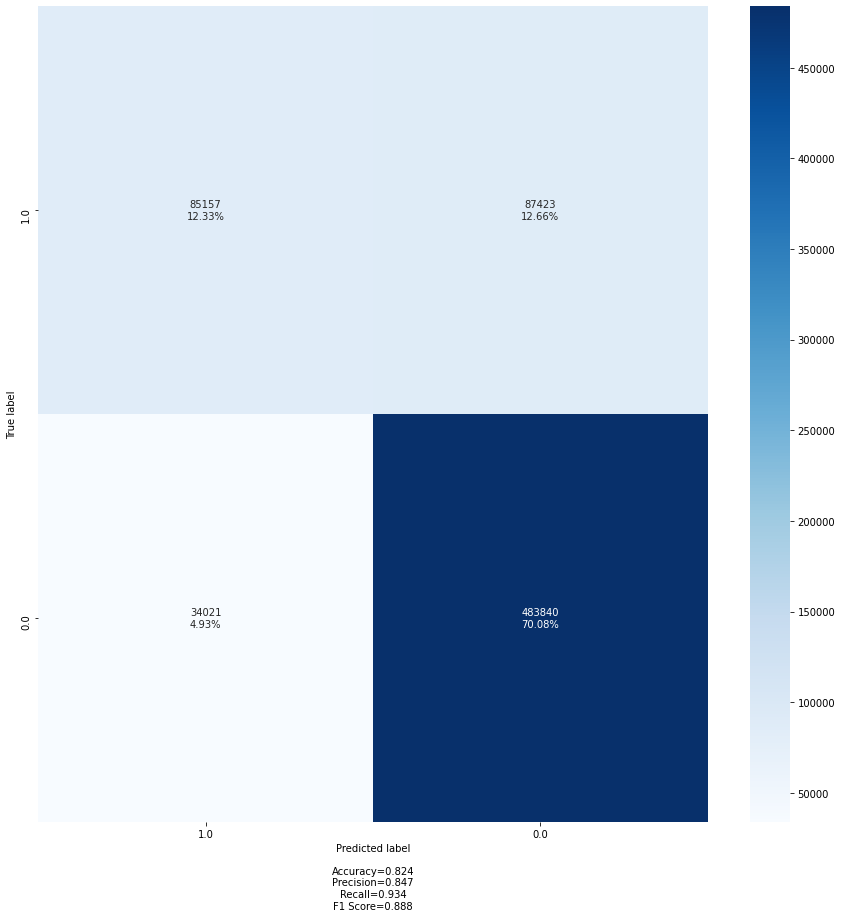

In [ ]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo = modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)


In [ ]:
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features)
grafico = graphviz.Source(dot_data)
grafico

NameError: ignored

#Decision Tree Regressor

In [ ]:
#TP_DEPENDENCIA_ADM_ESC

# x = publicas[["IDHM Educação 2010","TP_COR_RACA", "Q002", "Q024", "ClasseSocial"]]
y = dados["NU_MEDIA"]
# one_hot_data = pd.get_dummies(x)


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.45)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo_dummy = DummyRegressor()
modelo_dummy.fit(treino_x, treino_y)
dummy_predicoes = modelo_dummy.predict(teste_x)

mean_squared_error(teste_y, dummy_predicoes)

Treinaremos com 506323 elementos e testaremos com 414265 elementos


6512.226872915749

In [ ]:
modelo = DecisionTreeRegressor(max_depth=8)
modelo.fit(treino_x, treino_y)
predicoes_notas_lc = modelo.predict(teste_x)

print(mean_squared_error(teste_y, predicoes_notas_lc))

3939.136790344284


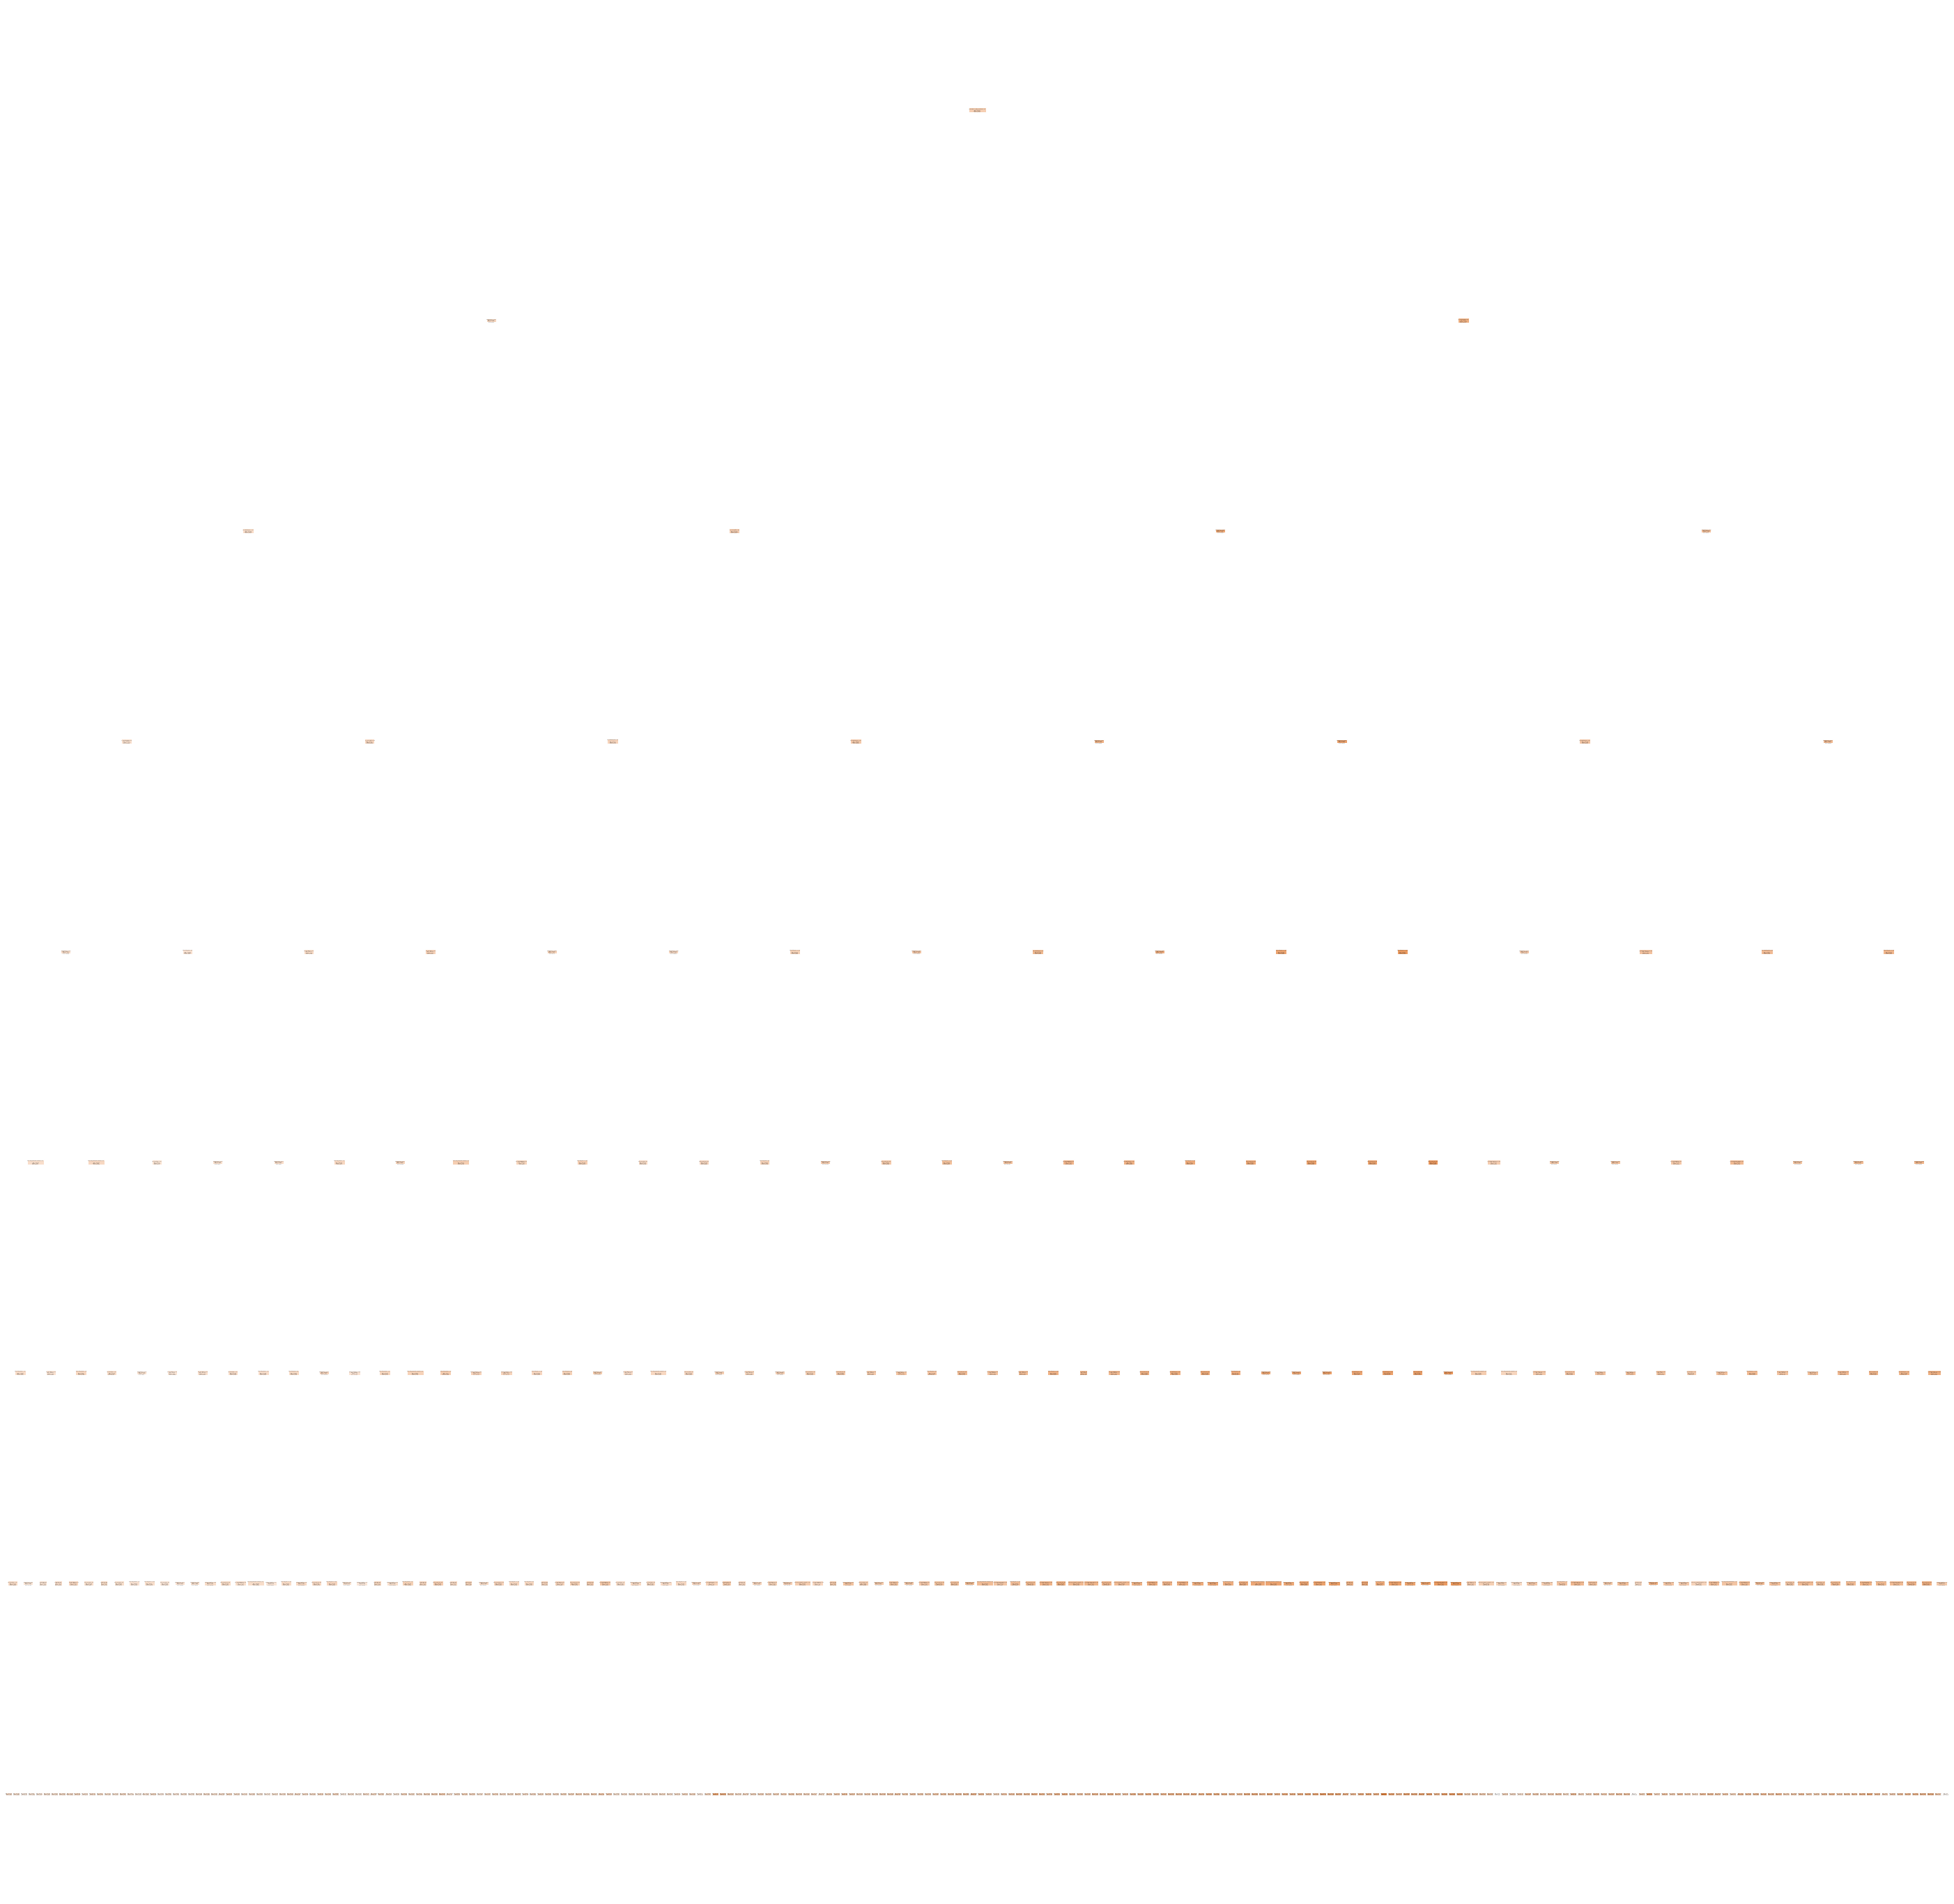

In [ ]:
from sklearn import tree
from matplotlib import figure


fig = figure.Figure(figsize=(250,200))
sns.set(rc={'figure.figsize':(50,50)})
x_names = x.columns.tolist()
y_names = "Media Nota"
_ = tree.plot_tree(modelo, 
                   feature_names=x_names,  
                   class_names=y_names,
                   filled=True)

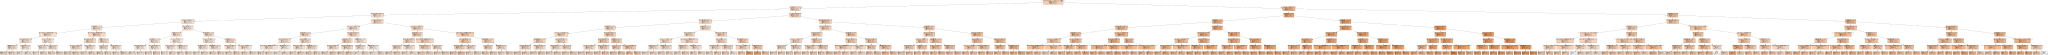

In [ ]:
dot_data = tree.export_graphviz(modelo, out_file=None, 
                                feature_names=x_names,  
                   class_names=y_names,
                   filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# Algoritmos para lidar com unbalanced data:

#https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf

# Oversample

In [ ]:
x = dados[['TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_LINGUA',
       'Estudo Pai', 'Estudo Mãe',
       'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima',
       'COR_RACA', 'RazaoPessoasQuarto' 
    ]]

y = dados["classificacao"]
one_hot_data = pd.get_dummies(x)
x = one_hot_data
x

In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.75,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

https://datascience.stackexchange.com/questions/15630/train-test-split-after-perform-smote#:~:text=2%20Answers&text=When%20use%20any%20sampling%20technique,only%20original%20samples)%20to%20evaluate.

## SMOTE



In [ ]:
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
oversample_treino_x, oversample_treino_y = oversample.fit_resample(treino_x, treino_y)

In [ ]:
len(treino_x)
treino_x

In [ ]:
len(oversample_treino_x)

In [ ]:
oversample_treino_x

## Criando um Baseline


In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent") #uniform
dummy_clf.fit(oversample_treino_x, oversample_treino_y)

previsoes_burras = dummy_clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_burras) * 100
print("A acurácia foi %.2f%%" % acuracia)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform") #uniform
dummy_clf.fit(treino_x, treino_y)

previsoes_burras = dummy_clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_burras) * 100
print("A acurácia foi %.2f%%" % acuracia)

## Decision Tree

In [ ]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo = modelo.fit(oversample_treino_x, oversample_treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)


In [ ]:
x

In [ ]:
features = x.columns.tolist()
r = export_text(modelo, feature_names=features)
print(r)



In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import pylab
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features)
grafico = graphviz.Source(dot_data)
grafico


In [ ]:
# from sklearn import tree
# plt.figure(figsize=(50 ,50 ))  # customize according to the size of your tree
# _ = tree.plot_tree(modelo, feature_names = x.columns)
# plt.show()

In [ ]:
modelo = DecisionTreeClassifier(max_depth=7)
modelo = modelo.fit(oversample_treino_x, oversample_treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

# Random Forest

In [ ]:
x = dados[['TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_LINGUA',
       'Estudo Pai', 'Estudo Mãe',
       'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima',
       'COR_RACA', 'RazaoPessoasQuarto' 
    ]]

y = dados["classificacao"]

one_hot_data = pd.get_dummies(x)
x = one_hot_data
# y=y.astype('string')



In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.45)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


Treinaremos com 506323 elementos e testaremos com 414265 elementos


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x,teste_y))



0.8096846221621425


0.7923299145613757


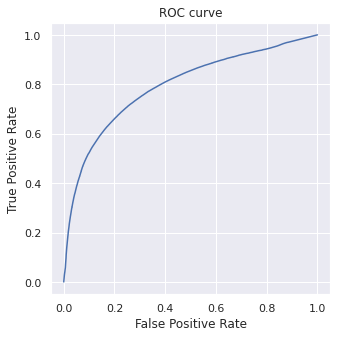

In [ ]:
plt.figure(figsize=(5,5 ))
calcRoc(teste_y,teste_x,classificador)


# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


modelo = SVC()
clf = modelo.fit(treino_x, treino_y)


previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
plt.figure(figsize=(5,5 ))
calcRoc(teste_y,teste_x,classificador)
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

# Matrix de Confusão Exemplo

In [ ]:
y_true = ["gato", "formiga", "gato", "gato", "formiga", "gato"]
y_pred = ["formiga", "formiga", "gato", "gato", "formiga", "gato"]
confusion_matrix(y_true, y_pred, labels=["gato","formiga", "passaro"])
make_confusion_matrix(confusion_matrix(y_true, y_pred, labels=["gato","formiga"]), figsize=(15,15),categories= ["Gato", "Formiga"])

#y_true = ["gato", "formiga", "gato", "gato", "formiga", "passaro"]
#y_pred = ["formiga", "formiga", "gato", "gato", "formiga", "gato"]
#confusion_matrix(y_true, y_pred, labels=["gato","formiga", "passaro"])
#make_confusion_matrix(confusion_matrix(y_true, y_pred, labels=["gato","formiga", "passaro"]), figsize=(15,15))


# TP FP 
# FN TN 

In [ ]:
confusion_matrix(teste_y, previsoes,labels)
# make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories = labels)

# Avaliando a solução: Precision, Recall, F1



### Recall: 
De todas as classes positivas, o quanto previmos corretamente. Deve ser o mais alto possível.

### Precision:
De todas as classes positivas que previmos corretamente, quantas são realmente positivas.

### Accuracy

De todas as classes, o quanto previmos corretamente. Deve ser o mais alto possível

### F-Score

É difícil comparar dois modelos com baixa precisão e alto recall ou vice-versa. Portanto, para torná-los comparáveis, usamos o F-Score. O F-Score ajuda a medir o recall e a precisão ao mesmo tempo

# ROC Curve

https://sites.icmc.usp.br/gbatista/files/ieee_la2008.pdf

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
def calcRoc(teste_y, teste_x, modelo):
  p = modelo.predict_proba(teste_x)[:,1]
  auc = roc_auc_score(teste_y,p)
  print(auc)
  fpr, tpr, _ = roc_curve(teste_y,p)

  plt.clf()
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.show()



# Script Matrix Confusão Bonitinha

In [17]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [116]:
col = dados.loc[: , "NU_NOTA_CN":"NU_NOTA_REDACAO"]

col.drop("TP_LINGUA", inplace= True, axis=1)

# Clusterização

In [117]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(col.values)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import time
oldTime = time.time()

clusterer = KMeans(n_clusters=2,random_state=13,max_iter=300)
cluster_labels = clusterer.fit_predict(X)



labels = pd.DataFrame(clusterer.labels_)



elapsed = time.time() - oldTime;

print("Time: ", elapsed)



Time:  6.661114692687988


## Silhueta

In [15]:
oldTime = time.time()
silhouette_avg = silhouette_score(X, cluster_labels, n)
print(silhouette_avg)

elapsed = time.time() - oldTime;

print("Time: ", elapsed)

NameError: name 'time' is not defined